# Data Loading

In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

frames = []

for root, dirs, files in os.walk('../data/'):
    for f in files:
        if f.endswith(".csv"):
            file_path = os.path.join(root, f)
            dataframe = pd.read_csv(file_path)
            dataframe.columns=dataframe.columns.str.replace('\t','')
            frames.append(dataframe)

data = pd.concat(frames, sort=False)[['Optimal_Affected_Component', 'Optimal_Failure', 'Optimal_Utility_Increase']]

# Data Transformation

## Cube Root Transformation

In [3]:
data_cube = data.apply(lambda x: np.power(x, (1/3)) if x.name == 'Optimal_Utility_Increase' else x)

## Square Root Transformation

In [4]:
data_sqt = data.apply(lambda x: np.sqrt(x) if x.name == 'Optimal_Utility_Increase' else x)

## Logarithm Transformation

In [6]:
data_log10 = data.apply(lambda x: np.log10(x) if x.name == 'Optimal_Utility_Increase' else x)
data_log = data.apply(lambda x: np.log(x) if x.name == 'Optimal_Utility_Increase' else x)
data_log2 = data.apply(lambda x: np.log2(x) if x.name == 'Optimal_Utility_Increase' else x)

# Comparison of the results

## Skewness

In [59]:
data_skw = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('skew').rename(columns={'Optimal_Utility_Increase': 'untransformed'})
data_cub_skw = data_cube.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('skew').rename(columns={'Optimal_Utility_Increase': 'cube'})
data_sqt_skw = data_sqt.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('skew').rename(columns={'Optimal_Utility_Increase': 'square'})
data_log10_skw = data_log10.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('skew').rename(columns={'Optimal_Utility_Increase': 'log10'})

result_skw = reduce(lambda x,y: pd.merge(x,y, on=['Optimal_Affected_Component', 'Optimal_Failure']), [data_skw, data_cub_skw, data_sqt_skw, data_log10_skw])


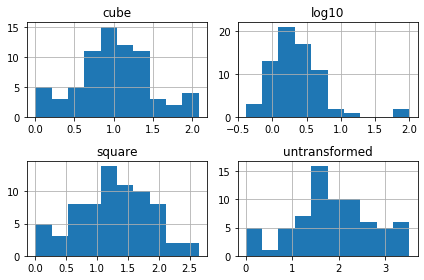

In [60]:
result_skw.hist() 
plt.tight_layout()
plt.show()

In [78]:
# calculate the differences 
for index, row in result_skw.iterrows():
    result_skw.loc[index, 'cube_diff'] = abs(row['untransformed'] - row['cube'])
    result_skw.loc[index, 'square_diff'] = abs(row['untransformed'] - row['square'])
    result_skw.loc[index, 'log10_diff'] = abs(row['untransformed'] - row['log10'])

In [82]:
result_skw.sort_values(by='cube_diff', ascending=False).head()

untransformed      cube    square  \
Optimal_Affected_Component Optimal_Failure                                      
Region Item Filter         CF1                   3.291487  1.124491  1.917922   
User Management Service    CF3                   3.388782  1.470905  2.118620   
Persistence Service        CF3                   3.411032  1.718235  2.277517   
                           CF1                   3.013303  1.369319  1.832723   
Item Management Service    CF2                   2.759802  1.116198  1.644769   

                                               log10  cube_diff  square_diff  \
Optimal_Affected_Component Optimal_Failure                                     
Region Item Filter         CF1             -0.283268   2.166997     1.373565   
User Management Service    CF3              0.209008   1.917877     1.270162   
Persistence Service        CF3              0.691225   1.692797     1.133515   
                           CF1              0.527075   1.643985     1.180581   
Item Management Service    CF2              0.101102   1.643605     1.115033   

                                            log10_diff  
Optimal_Affected_Component Optimal_Failure              
Region Item Filter         CF1                3.574755  
User Management Service    CF3                3.179774  
Persistence Service        CF3                2.719808  
                           CF1                2.486229  
Item Management Service    CF2                2.658701

In [83]:
result_skw.sort_values(by='square_diff', ascending=False).head()

untransformed      cube    square  \
Optimal_Affected_Component Optimal_Failure                                      
Region Item Filter         CF1                   3.291487  1.124491  1.917922   
User Management Service    CF3                   3.388782  1.470905  2.118620   
Persistence Service        CF1                   3.013303  1.369319  1.832723   
                           CF3                   3.411032  1.718235  2.277517   
Authentication Service     CF2                   2.604716  1.013358  1.479789   

                                               log10  cube_diff  square_diff  \
Optimal_Affected_Component Optimal_Failure                                     
Region Item Filter         CF1             -0.283268   2.166997     1.373565   
User Management Service    CF3              0.209008   1.917877     1.270162   
Persistence Service        CF1              0.527075   1.643985     1.180581   
                           CF3              0.691225   1.692797     1.133515   
Authentication Service     CF2              0.097976   1.591358     1.124927   

                                            log10_diff  
Optimal_Affected_Component Optimal_Failure              
Region Item Filter         CF1                3.574755  
User Management Service    CF3                3.179774  
Persistence Service        CF1                2.486229  
                           CF3                2.719808  
Authentication Service     CF2                2.506740

In [84]:
result_skw.sort_values(by='log10_diff', ascending=False).head()

,,untransformed,cube,square,log10,cube_diff,square_diff,log10_diff
Optimal_Affected_Component,Optimal_Failure,,,,,,,
Region Item Filter,CF1,3.291487,1.124491,1.917922,-0.283268,2.166997,1.373565,3.574755
User Management Service,CF3,3.388782,1.470905,2.118620,0.209008,1.917877,1.270162,3.179774
Persistence Service,CF3,3.411032,1.718235,2.277517,0.691225,1.692797,1.133515,2.719808
Item Management Service,CF2,2.759802,1.116198,1.644769,0.101102,1.643605,1.115033,2.658701
Query Service,CF3,3.238886,1.783275,2.318308,0.663396,1.455611,0.920578,2.575491


## Kurtosis

In [86]:
data_krt = data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg(pd.DataFrame.kurt).rename(columns={'Optimal_Utility_Increase': 'untransformed'})
data_cub_krt = data_cube.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg(pd.DataFrame.kurt).rename(columns={'Optimal_Utility_Increase': 'cube'})
data_sqt_krt = data_sqt.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg(pd.DataFrame.kurt).rename(columns={'Optimal_Utility_Increase': 'square'})
data_log10_krt = data_log10.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg(pd.DataFrame.kurt).rename(columns={'Optimal_Utility_Increase': 'log10'})

result_krt = reduce(lambda x,y: pd.merge(x,y, on=['Optimal_Affected_Component', 'Optimal_Failure']), [data_krt, data_cub_krt, data_sqt_krt, data_log10_krt])

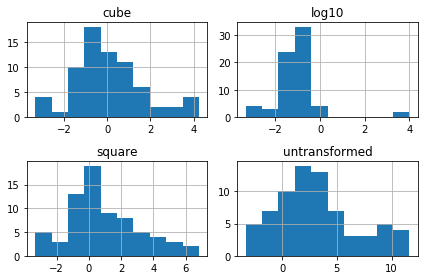

In [87]:
result_krt.hist() 
plt.tight_layout()
plt.show()

In [88]:
# calculate the differences 
for index, row in result_krt.iterrows():
    result_krt.loc[index, 'cube_diff'] = abs(row['untransformed'] - row['cube'])
    result_krt.loc[index, 'square_diff'] = abs(row['untransformed'] - row['square'])
    result_krt.loc[index, 'log10_diff'] = abs(row['untransformed'] - row['log10'])

In [89]:
result_krt.sort_values(by='cube_diff', ascending=False).head()

untransformed      cube  \
Optimal_Affected_Component    Optimal_Failure                            
User Management Service       CF3                  11.637059  2.383720   
Persistence Service           CF3                  11.213344  2.768352   
                              CF1                   9.657504  1.213890   
Region Item Filter            CF1                  10.171147  1.765736   
Last Second Sales Item Filter CF3                   8.846323  1.638016   

                                                 square     log10  cube_diff  \
Optimal_Affected_Component    Optimal_Failure                                  
User Management Service       CF3              4.883147 -0.691825   9.253340   
Persistence Service           CF3              5.090178 -0.450257   8.444992   
                              CF1              2.870166 -0.937749   8.443614   
Region Item Filter            CF1              4.256279 -0.778050   8.405411   
Last Second Sales Item Filter CF3              3.390282 -0.731907   7.208307   

                                               square_diff  log10_diff  
Optimal_Affected_Component    Optimal_Failure                           
User Management Service       CF3                 6.753913   12.328884  
Persistence Service           CF3                 6.123166   11.663601  
                              CF1                 6.787338   10.595253  
Region Item Filter            CF1                 5.914869   10.949198  
Last Second Sales Item Filter CF3                 5.456041    9.578229

In [90]:
result_krt.sort_values(by='square_diff', ascending=False).head()

,,untransformed,cube,square,log10,cube_diff,square_diff,log10_diff
Optimal_Affected_Component,Optimal_Failure,,,,,,,
Persistence Service,CF1,9.657504,1.213890,2.870166,-0.937749,8.443614,6.787338,10.595253
User Management Service,CF3,11.637059,2.383720,4.883147,-0.691825,9.253340,6.753913,12.328884
Persistence Service,CF3,11.213344,2.768352,5.090178,-0.450257,8.444992,6.123166,11.663601
Region Item Filter,CF1,10.171147,1.765736,4.256279,-0.778050,8.405411,5.914869,10.949198
Reputation Service,CF1,8.761570,1.655211,3.240772,-0.715346,7.106359,5.520798,9.476915


In [92]:
result_krt.sort_values(by='log10_diff', ascending=False).head()

,,untransformed,cube,square,log10,cube_diff,square_diff,log10_diff
Optimal_Affected_Component,Optimal_Failure,,,,,,,
User Management Service,CF3,11.637059,2.383720,4.883147,-0.691825,9.253340,6.753913,12.328884
Persistence Service,CF3,11.213344,2.768352,5.090178,-0.450257,8.444992,6.123166,11.663601
User Management Service,CF1,11.157138,4.248672,6.813053,0.039123,6.908466,4.344086,11.118015
Region Item Filter,CF1,10.171147,1.765736,4.256279,-0.778050,8.405411,5.914869,10.949198
Persistence Service,CF1,9.657504,1.213890,2.870166,-0.937749,8.443614,6.787338,10.595253
